1. glob을 이용하여 5개 엑셀 파일을 통합하여 station_raw 데이터프레임 생성

In [174]:
import pandas as pd
from glob import glob

In [175]:
import os
os.chdir(r'c:\pda')

In [176]:
glob('./pda_final/지역*.xlsx')

['./pda_final\\지역_위치별(주유소) (1).xlsx',
 './pda_final\\지역_위치별(주유소) (2).xlsx',
 './pda_final\\지역_위치별(주유소) (3).xlsx',
 './pda_final\\지역_위치별(주유소) (4).xlsx',
 './pda_final\\지역_위치별(주유소).xlsx']

In [177]:
stations_files=glob('./pda_final/지역*.xlsx')
stations_files

['./pda_final\\지역_위치별(주유소) (1).xlsx',
 './pda_final\\지역_위치별(주유소) (2).xlsx',
 './pda_final\\지역_위치별(주유소) (3).xlsx',
 './pda_final\\지역_위치별(주유소) (4).xlsx',
 './pda_final\\지역_위치별(주유소).xlsx']

In [178]:
tmp_raw=[]

for file_name in stations_files:
    tmp=pd.read_excel(file_name)
    tmp_raw.append(tmp)
    
station_raw =pd.concat(tmp_raw)    

In [179]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 58
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      232 non-null    object 
 1   상호      232 non-null    object 
 2   주소      232 non-null    object 
 3   상표      232 non-null    object 
 4   전화번호    232 non-null    object 
 5   셀프여부    232 non-null    object 
 6   고급휘발유   232 non-null    object 
 7   휘발유     232 non-null    object 
 8   경유      232 non-null    object 
 9   실내등유    232 non-null    object 
 10  구       232 non-null    object 
 11  lat     232 non-null    float64
 12  lng     232 non-null    float64
dtypes: float64(2), object(11)
memory usage: 25.4+ KB


In [180]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유,구,lat,lng
0,대전광역시,현암주유소,대전 동구 동서대로 1494 (삼성동),GS칼텍스,042-634-3151,Y,-,1533,1333,-,동구,36.339256,127.420034
1,대전광역시,용전셀프주유소,대전 동구 동서대로 1627(홍도동),현대오일뱅크,042-637-8838,Y,1779,1537,1337,-,동구,36.347030,127.430743
2,대전광역시,참좋은주유소,대전 동구 계족로 501 (용전동),SK에너지,042-625-9300,Y,-,1537,1337,-,동구,36.356528,127.432434
3,대전광역시,유원주유소,대전 동구 계족로 513 (용전동),GS칼텍스,042-672-3613,Y,-,1539,1339,990,동구,36.357459,127.432419
4,대전광역시,(주)하늘셀프주유소,대전 동구 대전로 549,SK에너지,042-283-5151,Y,-,1543,1333,-,동구,36.311581,127.444609


2.  station_raw 데이터프레임의 필드 중 상호, 주소, 휘발유, 셀프여부, 상표, lat, lng 필드만을 선택하여 stations 데이터프레임 생성

In [181]:
stations=pd.DataFrame({'Oil_store':station_raw['상호'],
                      '주소':station_raw['주소'],
                       '가격':station_raw['휘발유'],
                       '셀프':station_raw['셀프여부'],
                       '상표':station_raw['상표'],
                      'lat':station_raw['lat'],
                      'lng':station_raw['lng']})
stations

,Oil_store,주소,가격,셀프,상표,lat,lng
0,현암주유소,대전 동구 동서대로 1494 (삼성동),1533,Y,GS칼텍스,36.339256,127.420034
1,용전셀프주유소,대전 동구 동서대로 1627(홍도동),1537,Y,현대오일뱅크,36.347030,127.430743
2,참좋은주유소,대전 동구 계족로 501 (용전동),1537,Y,SK에너지,36.356528,127.432434
3,유원주유소,대전 동구 계족로 513 (용전동),1539,Y,GS칼텍스,36.357459,127.432419
4,(주)하늘셀프주유소,대전 동구 대전로 549,1543,Y,SK에너지,36.311581,127.444609
...,...,...,...,...,...,...,...
54,장터주유소,대전 대덕구 아리랑로 152 (읍내동),1599,N,GS칼텍스,36.372897,127.420693
55,비전운수(주)산업단지주유소,대전 대덕구 산업단지로 107,1619,N,GS칼텍스,36.429782,127.409735
56,대덕산업단지관리공단주유사업소,대전 대덕구 문평동로 2 (문평동),1628,N,현대오일뱅크,36.445414,127.404310
57,맘모스주유소,대전 대덕구 동서대로 1756 (비래동),1756,N,SK에너지,36.352336,127.443365


In [182]:
stations['구']=[eachAddress.split()[1] for eachAddress in stations['주소']]

In [183]:
stations

,Oil_store,주소,가격,셀프,상표,lat,lng,구
0,현암주유소,대전 동구 동서대로 1494 (삼성동),1533,Y,GS칼텍스,36.339256,127.420034,동구
1,용전셀프주유소,대전 동구 동서대로 1627(홍도동),1537,Y,현대오일뱅크,36.347030,127.430743,동구
2,참좋은주유소,대전 동구 계족로 501 (용전동),1537,Y,SK에너지,36.356528,127.432434,동구
3,유원주유소,대전 동구 계족로 513 (용전동),1539,Y,GS칼텍스,36.357459,127.432419,동구
4,(주)하늘셀프주유소,대전 동구 대전로 549,1543,Y,SK에너지,36.311581,127.444609,동구
...,...,...,...,...,...,...,...,...
54,장터주유소,대전 대덕구 아리랑로 152 (읍내동),1599,N,GS칼텍스,36.372897,127.420693,대덕구
55,비전운수(주)산업단지주유소,대전 대덕구 산업단지로 107,1619,N,GS칼텍스,36.429782,127.409735,대덕구
56,대덕산업단지관리공단주유사업소,대전 대덕구 문평동로 2 (문평동),1628,N,현대오일뱅크,36.445414,127.404310,대덕구
57,맘모스주유소,대전 대덕구 동서대로 1756 (비래동),1756,N,SK에너지,36.352336,127.443365,대덕구


3. 데이터 전처리
  3.1. stations 데이터프레임 주소 컬럼에서 대전시 소재' 구' 이름이 잘못된 데이터 찾아 오류 수정


In [184]:
stations['구'].unique()

array(['동구', '서구', '유성구', '중구', '광역시', '대덕구'], dtype=object)

In [185]:
stations[stations['구']=='광역시']

,Oil_store,주소,가격,셀프,상표,lat,lng,구
32,도서관주유소,대전 광역시 중구 보문산로 353,1565,Y,현대오일뱅크,36.313669,127.415378,광역시


In [186]:
stations.loc[stations['구']=='광역시', '구']='중구'

  3.2. 가격이 - 로 되어 있는 오류 데이터 찾아 삭제

In [187]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,lat,lng,구
31,태양주유소,대전 동구 한밭대로 1258 (용전동),-,Y,SK에너지,36.355480,127.436165,동구
43,중도석유(주) 도마동주유소,대전 서구 계백로 1371 (도마동),-,Y,GS칼텍스,36.310892,127.374258,서구
57,계명주유소,대전 유성구 현충원로 492,-,N,S-OIL,36.359243,127.325608,유성구
58,(주)상아에너지,대전 유성구 계백로 476 (방동),-,N,GS칼텍스,36.276060,127.293618,유성구
37,대웅에너지,대전 중구 대종로 557 (선화동),-,Y,현대오일뱅크,36.332315,127.420792,중구


In [188]:
stations=stations[stations['가격']!='-']


In [189]:
stations['가격'] =[float(value) for value in stations['가격']]

<ipython-input-189-f8f24e701327>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격'] =[float(value) for value in stations['가격']]


In [190]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 58
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  227 non-null    object 
 1   주소         227 non-null    object 
 2   가격         227 non-null    float64
 3   셀프         227 non-null    object 
 4   상표         227 non-null    object 
 5   lat        227 non-null    float64
 6   lng        227 non-null    float64
 7   구          227 non-null    object 
dtypes: float64(3), object(5)
memory usage: 16.0+ KB


In [191]:
stations.reset_index(inplace=True)
del stations['index']

In [192]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  227 non-null    object 
 1   주소         227 non-null    object 
 2   가격         227 non-null    float64
 3   셀프         227 non-null    object 
 4   상표         227 non-null    object 
 5   lat        227 non-null    float64
 6   lng        227 non-null    float64
 7   구          227 non-null    object 
dtypes: float64(3), object(5)
memory usage: 14.3+ KB


4. matplotlib 를 활용해서 boxplot 3개 작성

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path= "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.. sorry~~~')

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

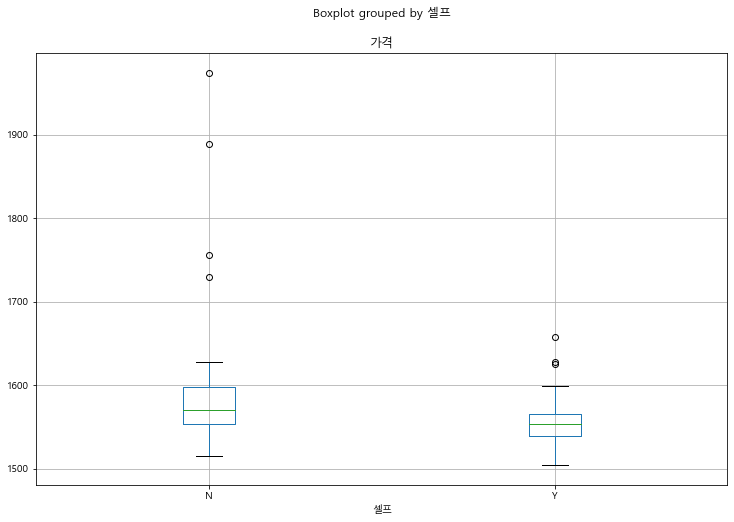

In [194]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

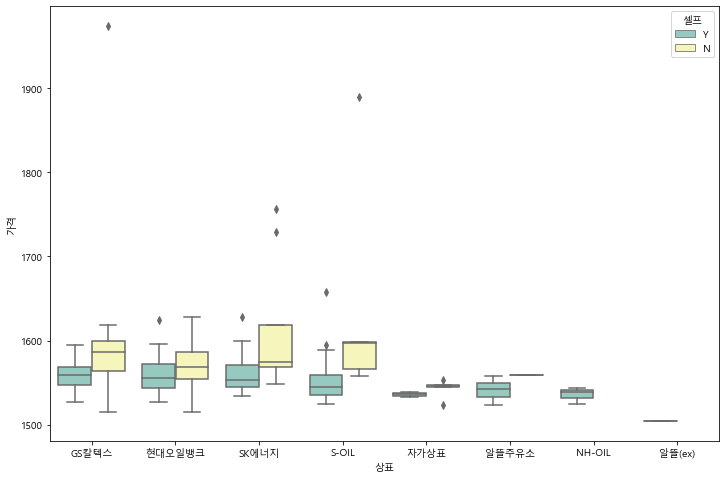

In [195]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

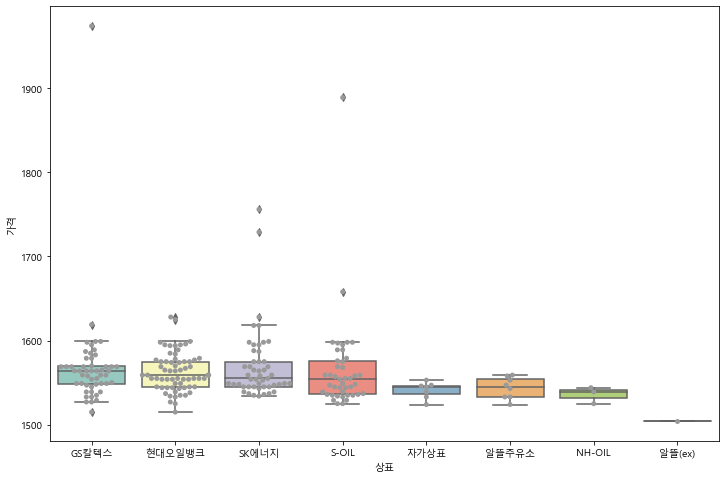

In [196]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()

5. stations 데이터프레임의 휘발류  가격을 기준으로 가격이 높은 top10 주유소와 낮은 bottom10 주유소 데이터프레임 생성

In [197]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action="ignore", category = FutureWarning)

In [198]:
top10 = stations.sort_values(by='가격', ascending=False).head(10)

In [199]:
top10

,Oil_store,주소,가격,셀프,상표,lat,lng,구
226,한솔주유소,대전 대덕구 한밭대로 1036 (오정동),1974.0,N,GS칼텍스,36.357987,127.413716,대덕구
130,계룡주유소,대전 유성구 현충원로 177,1889.0,N,S-OIL,36.360484,127.291032,유성구
225,맘모스주유소,대전 대덕구 동서대로 1756 (비래동),1756.0,N,SK에너지,36.352336,127.443365,대덕구
167,영광주유소,대전 중구 문화로 95 (유천동),1729.0,N,SK에너지,36.312219,127.396268,중구
73,삼정주유소,대전 서구 대덕대로 384 (만년동),1658.0,Y,S-OIL,36.367091,127.380019,서구
224,대덕산업단지관리공단주유사업소,대전 대덕구 문평동로 2 (문평동),1628.0,N,현대오일뱅크,36.445414,127.404310,대덕구
129,예성주유소,대전광역시 유성구 도안동로 488,1628.0,Y,SK에너지,36.340367,127.349237,유성구
72,타임셀프주유소,대전 서구 대덕대로 188 (둔산2동),1625.0,Y,현대오일뱅크,36.349595,127.377986,서구
223,비전운수(주)산업단지주유소,대전 대덕구 산업단지로 107,1619.0,N,GS칼텍스,36.429782,127.409735,대덕구
71,SK에너지(주) 둔산주유소,대전 서구 둔산로 139,1618.0,N,SK에너지,36.351504,127.389524,서구


In [200]:
bottom10 = stations.sort_values(by='가격', ascending=True).head(10)

In [201]:
bottom10

,Oil_store,주소,가격,셀프,상표,lat,lng,구
168,신탄진(상)주유소/충전소,대전 대덕구 산업단지로 27,1504.0,Y,알뜰(ex),36.428274,127.417996,대덕구
169,소태산주유소,대전 대덕구 신탄진로 163 (신대동),1515.0,N,현대오일뱅크,36.395361,127.421720,대덕구
170,CJ대한통운㈜ 대전지사주유소,대전 대덕구 신탄진로 1 (읍내동),1515.0,N,GS칼텍스,36.382769,127.424751,대덕구
172,일등주유소,대전 대덕구 신탄진로 636 (평촌동),1524.0,N,자가상표,36.435017,127.425410,대덕구
171,신탄진알뜰주유소,대전 대덕구 대덕대로1527번길 374,1524.0,Y,알뜰주유소,36.453453,127.428377,대덕구
31,선진주유소,대전 서구 배재로 205,1525.0,N,현대오일뱅크,36.326877,127.370066,서구
173,신탄진농협주유소,대전 대덕구 덕암로 164,1525.0,Y,NH-OIL,36.435242,127.422511,대덕구
74,롯데마트 서대전점주유소,대전 유성구 유성대로 26-37 (원내동),1525.0,Y,S-OIL,36.301699,127.323308,유성구
174,쌍용주유소,대전 대덕구 신탄진로 83 (연축동),1525.0,Y,S-OIL,36.388194,127.421625,대덕구
34,(주)혜천셀프주유소,대전 서구 혜천로 28,1527.0,Y,GS칼텍스,36.306610,127.369742,서구


6. folium을 이용하여   top10 데이터프레임과 bottom10 데이터프레임의  위도 경도 정보로 대전 지도에 주유소 20곳을 표시. 대전 관련 지도 정보와 표시는 다음 코드로 대체하세요.

In [202]:
map = folium.Map(location=[36.340, 127.3935], zoom_start=11, titles='Stamen Toner')
                 
for n in top10.index:
    if pd.notnull(top10['lat'][n]):
        folium.CircleMarker([top10['lat'][n], 
                             top10['lng'][n]],
                           radius=15, colors='#CD3181',
                           fill_color='#CD3181').add_to(map)

        
for n in bottom10.index:
    if pd.notnull(bottom10['lat'][n]):
        folium.CircleMarker([bottom10['lat'][n], 
                             bottom10['lng'][n]],
                           radius=15, colors='#3186cc',
                           fill_color='#3186cc').add_to(map)

map

7. 마지막으로 다음 질문과 이에 대한 답을 jupyter notebook의 코드로 계산하세요.

 7.1. top10 주유소 평균가격과 bottom10 주유소 평균가격의 차이

In [203]:
top10['가격'].mean()-bottom10['가격'].mean()

191.5

  7.2. 대전 구별 전체 주유소 평균가격

In [204]:
import numpy as np
gu_data=pd.pivot_table(stations, index=["구"], values=["가격"],
                       aggfunc=np.mean)
gu_data.head()

,가격
구,
대덕구,1568.898305
동구,1556.096774
서구,1562.441860
유성구,1573.824561
중구,1552.108108
